MIPS Computer Literacy Bootcamp: Coding Project

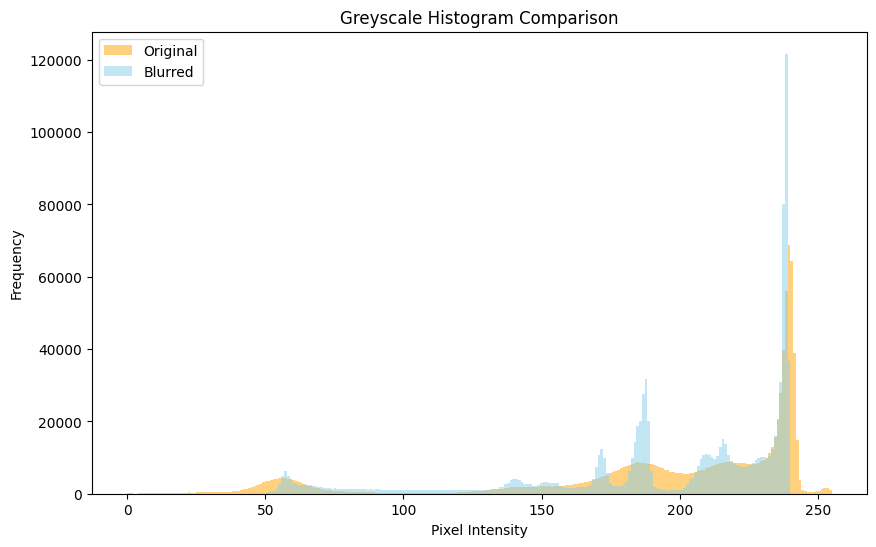

KS Statistic: 0.15662097930908203
P-value: 0.00e+00
Result: There is a statistically significant difference between the original and blurred image histograms.


In [30]:
# ChatGPT was used to assist in generating this code
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter  # scipy.ndimage for image processing
from scipy.stats import ks_2samp            
from PIL import Image
import cv2  # for resizing

# Step 1: Load the 500x500 8-bit greyscale image
img_path = "./starting_image.png"  
original_img = Image.open(img_path).convert("L")  # 'L' mode = greyscale (8-bit) - safe way to ensure image is in the correct mode for greyscale processing
original_array = np.array(original_img)           # np.array() converts the image into a 2D NumPy array where each pixel becomes a number (0-255 in greyscale)

# Step 2: Apply Gaussian Blur to the image
# You can tweak the sigma value for stronger or weaker blurring - higher = more blur
blurred_array = gaussian_filter(original_array, sigma=3)

# Step 3: Plot histograms of original and blurred images
plt.figure(figsize=(10, 6))
plt.hist(original_array.flatten(), bins=256, range=(0, 255), color="orange", alpha=0.5, label='Original')   # .flatten() converts a multi-dimensional array into a 1D array; alpha is opacity
plt.hist(blurred_array.flatten(), bins=256, range=(0, 255), color="skyblue", alpha=0.5, label='Blurred')
plt.title("Greyscale Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("histogram_comparison.png")
plt.show()

# Step 4: Statistical comparison using SciPy (Kolmogorov-Smirnov (KS) test)
# The KS test compares two independent data distributions and often used to compare histograms or pixel values
statistic, p_value = ks_2samp(original_array.flatten(), blurred_array.flatten())
print("KS Statistic:", statistic)   # a number between 0 and 1; closer to 1 means the distributions are more different
print(f"P-value: {p_value:.2e}")    # scientific notation
if p_value < 0.05:
    print("Result: There is a statistically significant difference between the original and blurred image histograms.")
else:
    print("Result: There is no statistically significant difference between the original and blurred image histograms.")

# Step 5: Save the blurred image as PNG
blurred_img = Image.fromarray(blurred_array.astype(np.uint8))  
# .astype(np.uint8) ensures data is in a valid format for image creation; converts data type of blurred_array to uint8 (unsigned 8-bit integer) meaning values ranging from 0 to 255 (greyscale)
blurred_img.save("blurred_image.png")

# Step 6: Downscale to 250x250 and save
downscaled_array = cv2.resize(blurred_array, (250, 250), interpolation=cv2.INTER_AREA)  # cv2.INTER_AREA is an OpenCV interpolation method best for shrinking images/downscaling
downscaled_img = Image.fromarray(downscaled_array.astype(np.uint8))
downscaled_img.save("blurred_downscaled_250x250.png")

# Done! All outputs saved.